In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   pytest.ini
 BAAD16DATASET			   README.rst
 BACC1.csv			   requirements
 BACC2.csv			   samledata.csv
 bengali_stemmer		   setup.cfg
 bengali-stemmer-dev		   setup.py
 bengali_stemmer.egg-info	   stemmer.ipynb
 bengali_word2vec		   Stopwords.csv
 bengali_word2vec.model		   stopwordsnew.csv
 bn_glove.39M.300d.txt		   tests
 build				   try_w2v.ipynb
 cc.bn.300.vec			   ulm1.csv
'Copy of ulm_train.csv'		   ulm2.csv
 dist				   wbc.ipynb
 LICENSE			   word2vec.ipynb
'naivebias on bangla news.ipynb'  'word2veclast try.ipynb'
'new data.ipynb'


In [ ]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("ulm*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

Resultant CSV after joining all CSV files at a particular location...
     label                                               text  is_valid
0       ij  None বছর কয়েক হল সাদিয়া আর আশরাফ সুন্দরবনের বই...     False
1       fe  আমাদের জীবনচিত্রে যুদ্ধাপরাধীদের ছায়া আমাদের জ...     False
2       mk  নির্ভীক নেতৃত্বই উন্নয়নের সোপান ২৬ জুলাই (২০১৪...     False
3       rg  গ্রিসের স্ট্রবেরি খামারে বাংলাদেশিদের উপর গুলি...     False
4       ij  গল্প_ পাখিপুর সকালবেলায় চা শেষ করে একটা সিগারে...     False
...    ...                                                ...       ...
2095    rn  রহস্যময় বিতর্কিত পুরুষ রাসপুতিন ইতিহাস কি শুধু...     False
2096    fe  রাজনৈতিক মূর্খতা ও মুক্তিযুদ্ধের মৌলিক ফসল রাজ...     False
2097    mk  ইউপি ইলেকশন এবং ___ বাংলাদেশের তিন স্তরবিশিষ্ট...     False
2098    rn  মনে করি, A হলো একটি সফল জীবন। A=x+y+z, এখানে x...     False
2099    fe  বহির্বিশ্বে বাংলা সাহিত্য-সংস্কৃতির বীজ ও বীক্...     False

[2100 rows x 3 columns]


In [ ]:
data['label'].unique()

array(['ij', 'fe', 'mk', 'rg', 'rn', 'hm'], dtype=object)

In [ ]:
data.shape

(2100, 3)

In [ ]:
data.shape
data.dtypes

label       object
text        object
is_valid      bool
dtype: object

In [ ]:
LE= ['ij', 'fe', 'mk', 'rg', 'rn', 'hm']

In [ ]:
data.isnull().any()

label       False
text        False
is_valid    False
dtype: bool

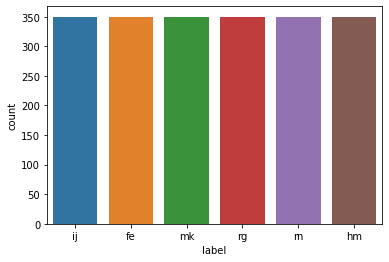

In [ ]:
sns.countplot(data.label)

In [ ]:
data['text_length'] = data['text'].str.len()
print(data['text_length'])

0       14041
1        7879
2       10188
3        3330
4        8472
        ...  
2095     3591
2096     8694
2097     8208
2098     4719
2099     8363
Name: text_length, Length: 2100, dtype: int64


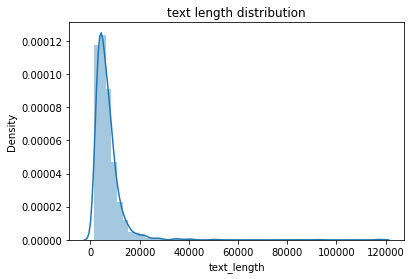

In [ ]:
sns.distplot(data['text_length']).set_title('text length distribution');

In [ ]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

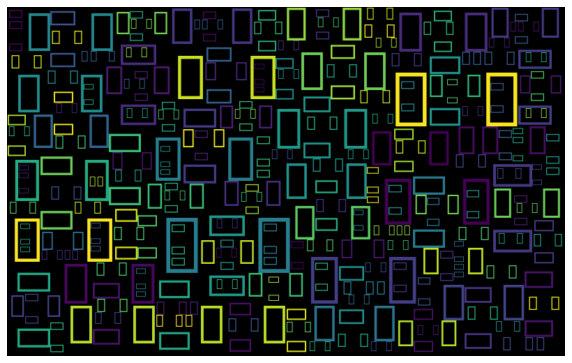

In [ ]:
subset=data[data.label=="hm"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
#Feature Engineering
#Removing the special characters
#1) \r
#2) \n

#Removing Punctuations and Stopwords

def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    stop_words = pd.read_csv('Stopwords.csv')
    #stop_words = set(stopwords.words('Stopwords.csv')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text


data['Text_parsed'] = data['text'].apply(process_text)
data.head()

In [ ]:
X = data['text'].values

In [ ]:
#Label Encoding


from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['label']) 
#BBC_News.head()


In [ ]:

#Split the data in Training and testing
X_train, X_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['label'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [ ]:
X_train.shape

(1680,)

In [ ]:
X_test.shape

(420,)

In [ ]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.26602874 0.2441253  0.         ... 0.14336297 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.14363093 0.06845718]
 [0.         0.         0.03466206 ... 0.04476896 0.         0.0895768 ]
 [0.         0.         0.0873147  ... 0.         0.         0.        ]]
(420, 300)


In [ ]:
#Building Models
#Random Forest


from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8238095238095238
              precision    recall  f1-score   support

          fe       0.84      0.82      0.83        72
          hm       0.84      0.89      0.87        55
          ij       0.84      0.93      0.88        67
          mk       0.78      0.81      0.79        77
          rg       0.87      0.68      0.77        79
          rn       0.79      0.86      0.82        70

    accuracy                           0.82       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.82      0.82       420



In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Hyper Paramater Tuning(Random Forest)

from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1200}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8238095238095238
              precision    recall  f1-score   support

          fe       0.84      0.82      0.83        72
          hm       0.84      0.89      0.87        55
          ij       0.84      0.93      0.88        67
          mk       0.78      0.81      0.79        77
          rg       0.87      0.68      0.77        79
          rn       0.79      0.86      0.82        70

    accuracy                           0.82       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.82      0.82       420



In [ ]:
#svm

smodel = svm . SVC ( C = 3, gamma = 'scale', kernel = 'rbf' )

smodel . fit ( sent_vectors , y_train )

In [ ]:
#Logistic Regression


model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.8785714285714286
              precision    recall  f1-score   support

          fe       0.88      0.85      0.87        72
          hm       0.86      0.93      0.89        55
          ij       0.95      0.93      0.94        67
          mk       0.83      0.88      0.86        77
          rg       0.94      0.82      0.88        79
          rn       0.82      0.89      0.85        70

    accuracy                           0.88       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.88      0.88      0.88       420



In [ ]:
#Hyper Parameter Tuning (Logistic Regression)

param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [ ]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8785714285714286
              precision    recall  f1-score   support

          fe       0.88      0.85      0.87        72
          hm       0.86      0.93      0.89        55
          ij       0.95      0.93      0.94        67
          mk       0.83      0.88      0.86        77
          rg       0.94      0.82      0.88        79
          rn       0.82      0.89      0.85        70

    accuracy                           0.88       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.88      0.88      0.88       420



In [ ]:
#KNeighborsClassifier


model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7023809523809523
              precision    recall  f1-score   support

          fe       0.66      0.64      0.65        72
          hm       0.56      0.95      0.70        55
          ij       0.75      0.82      0.79        67
          mk       0.65      0.86      0.74        77
          rg       0.90      0.54      0.68        79
          rn       0.97      0.47      0.63        70

    accuracy                           0.70       420
   macro avg       0.75      0.71      0.70       420
weighted avg       0.75      0.70      0.70       420



In [ ]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Hyper Paramaters Tuning (KNeighborsClassifier)

from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [ ]:
bestF.best_params_

{'n_neighbors': 7, 'p': 1}

In [ ]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6833333333333333
              precision    recall  f1-score   support

          fe       0.56      0.64      0.60        72
          hm       0.57      0.95      0.71        55
          ij       0.79      0.81      0.80        67
          mk       0.64      0.83      0.72        77
          rg       0.88      0.48      0.62        79
          rn       0.94      0.47      0.63        70

    accuracy                           0.68       420
   macro avg       0.73      0.70      0.68       420
weighted avg       0.74      0.68      0.68       420



In [ ]:
#Decision Tree


model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.5142857142857142
              precision    recall  f1-score   support

          fe       0.49      0.50      0.49        72
          hm       0.57      0.69      0.62        55
          ij       0.58      0.51      0.54        67
          mk       0.58      0.56      0.57        77
          rg       0.46      0.43      0.44        79
          rn       0.43      0.44      0.44        70

    accuracy                           0.51       420
   macro avg       0.52      0.52      0.52       420
weighted avg       0.51      0.51      0.51       420



In [ ]:

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
#Hyper Paramter Tuning (Decision Tree)

import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:

bestF.best_params_


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}

In [ ]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.5166666666666667
              precision    recall  f1-score   support

          fe       0.52      0.57      0.54        72
          hm       0.69      0.73      0.71        55
          ij       0.61      0.63      0.62        67
          mk       0.49      0.40      0.44        77
          rg       0.40      0.47      0.43        79
          rn       0.44      0.37      0.40        70

    accuracy                           0.52       420
   macro avg       0.53      0.53      0.52       420
weighted avg       0.52      0.52      0.51       420



In [ ]:

#GaussianNB

model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7428571428571429
              precision    recall  f1-score   support

          fe       0.75      0.85      0.80        72
          hm       0.85      0.73      0.78        55
          ij       0.63      0.96      0.76        67
          mk       0.75      0.77      0.76        77
          rg       0.84      0.54      0.66        79
          rn       0.74      0.64      0.69        70

    accuracy                           0.74       420
   macro avg       0.76      0.75      0.74       420
weighted avg       0.76      0.74      0.74       420



##Doc2Vec

In [ ]:
X = data['text'].values

In [ ]:
Doc = pd.DataFrame()
Doc['text'] = data['text'].values
Doc['label'] = data['Category_target']
Doc.head()

text  label
0  None বছর কয়েক হল সাদিয়া আর আশরাফ সুন্দরবনের বই...      2
1  আমাদের জীবনচিত্রে যুদ্ধাপরাধীদের ছায়া আমাদের জ...      0
2  নির্ভীক নেতৃত্বই উন্নয়নের সোপান ২৬ জুলাই (২০১৪...      3
3  গ্রিসের স্ট্রবেরি খামারে বাংলাদেশিদের উপর গুলি...      4
4  গল্প_ পাখিপুর সকালবেলায় চা শেষ করে একটা সিগারে...      2

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(Doc.text, Doc.label, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:

all_data[0:2]

[TaggedDocument(words=['তাসকিন-সানি', "আইসিসি'র", 'চূড়ান্ত', 'রাজনীতির', 'শিকার!!!', 'ইন্টারন্যাশনাল', 'ক্রিকেট', 'কাউন্সিল', 'বা', 'আইসিসি', 'বাংলাদেশের', 'ফাস্ট', 'বোলার', 'তাসকিন', 'আহমেদ', 'ও', 'স্পিনার', 'আরাফাত', "সানি'র", 'বোলিং', 'অ্যাকশান', 'অবৈধ', 'ঘোষণা', 'করে', 'আন্তর্জাতিক', 'ক্রিকেটে', 'তাদের', 'অবৈধ', 'ঘোষণা', 'করেছে।', 'আন্তর্জাতিক', 'ক্রিকেটে', 'এটি', 'এখন', 'নতুন', 'একটি', 'নীল', 'নকশার', 'অংশ।', 'আলোচনায়', 'যাবার', 'আগে', 'শুরুতে', 'আমরা', 'একটু', 'সেই', 'ম্যাচের', 'দিকে', 'যাই,', 'যে', 'ম্যাচে', 'তাসকিন', 'ও', 'সানির', 'বোলিং', 'অ্যাকশান', 'নিয়ে', 'কথা', 'উঠেছে।', '৯', 'মার্চ', '২০১৬', 'তারিখে', 'ধর্মশালায়', 'অনুষ্ঠিত', 'টি২০', 'বিশ্বকাপের', 'কোয়ালিফায়িং', 'রাউন্ডের', 'তৃতীয়', 'ম্যাচ,', 'যেটি', "'এ-গ্রুপ'-তে", 'বাংলাদেশ', 'বনাম', 'নেদারল্যান্ডের', 'মধ্যেকার', 'প্রথম', 'ম্যাচ।', 'ওই', 'খেলায়', 'নেদারল্যান্ড', 'টস', 'জিতে', 'বাংলাদেশকে', 'প্রথমে', 'ব্যাট', 'করার', 'আমন্ত্রণ', 'জানায়।', 'নির্ধারিত', '২০', 'ওভারে', 'বাংলাদেশ', '৭', 'উইকেট', 'হারিয়ে', '১৫৩', 'রান', 'করে।

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 2100/2100 [00:00<00:00, 1664406.35it/s]


In [ ]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
#SVM
from sklearn.svm import SVC
model = SVC()

model= model.fit(train_vectors_dbow, y_train)
model_prediction= model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9634920634920635
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        98
           1       1.00      0.98      0.99       115
           2       1.00      0.99      1.00       118
           3       0.85      0.98      0.91        89
           4       0.99      0.96      0.98       108
           5       0.94      0.99      0.96       102

    accuracy                           0.96       630
   macro avg       0.96      0.96      0.96       630
weighted avg       0.97      0.96      0.96       630



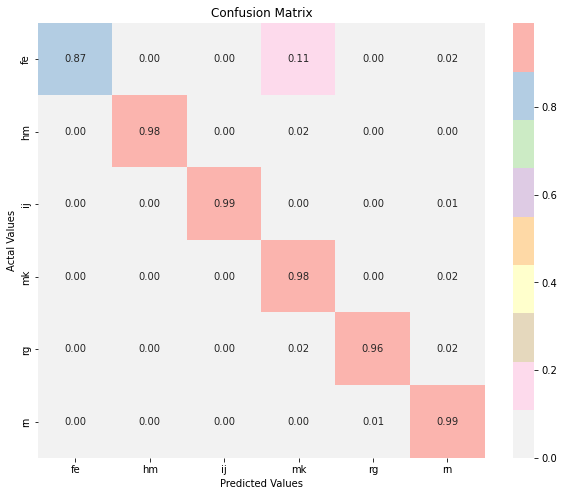

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:

#Logistic Regression
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9428571428571428
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        98
           1       1.00      0.97      0.98       115
           2       0.99      0.99      0.99       118
           3       0.86      0.91      0.89        89
           4       0.96      0.93      0.94       108
           5       0.89      0.96      0.92       102

    accuracy                           0.94       630
   macro avg       0.94      0.94      0.94       630
weighted avg       0.94      0.94      0.94       630



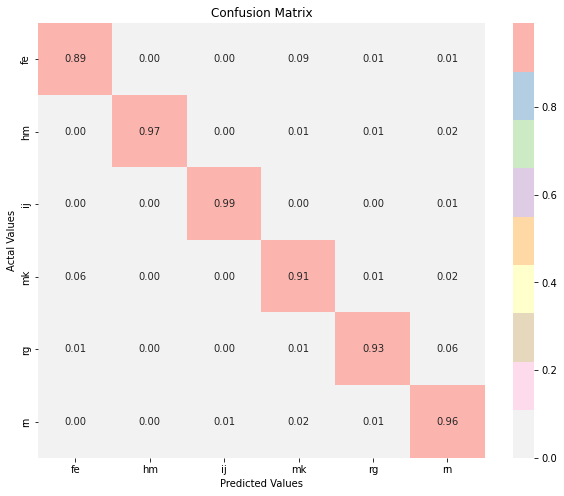

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:

model = GaussianNB()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9349206349206349
              precision    recall  f1-score   support

           0       0.98      0.81      0.88        98
           1       1.00      0.93      0.96       115
           2       0.97      0.99      0.98       118
           3       0.84      0.94      0.89        89
           4       0.98      0.93      0.95       108
           5       0.85      1.00      0.92       102

    accuracy                           0.93       630
   macro avg       0.94      0.93      0.93       630
weighted avg       0.94      0.93      0.94       630



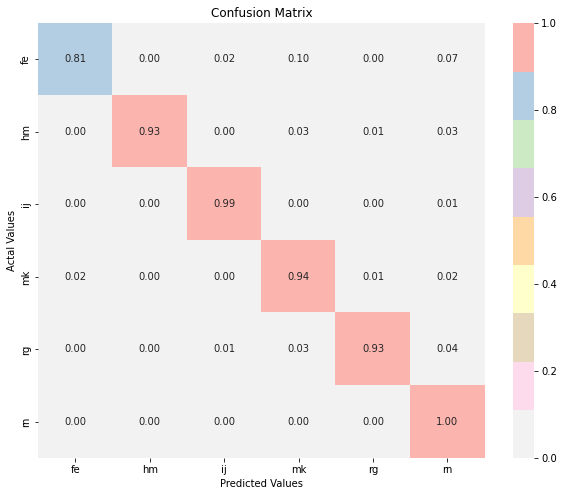

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.7158730158730159
              precision    recall  f1-score   support

           0       0.61      0.64      0.62        98
           1       0.81      0.79      0.80       115
           2       0.87      0.83      0.85       118
           3       0.55      0.72      0.62        89
           4       0.79      0.65      0.71       108
           5       0.69      0.64      0.66       102

    accuracy                           0.72       630
   macro avg       0.72      0.71      0.71       630
weighted avg       0.73      0.72      0.72       630



In [ ]:

#Hyper Parameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

In [ ]:
bestF.best_params_

In [ ]:

model = RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=2,n_estimators=1200)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9031746031746032
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        98
           1       0.97      0.87      0.92       115
           2       0.96      0.97      0.97       118
           3       0.75      0.96      0.84        89
           4       0.96      0.87      0.91       108
           5       0.87      0.94      0.91       102

    accuracy                           0.90       630
   macro avg       0.91      0.90      0.90       630
weighted avg       0.91      0.90      0.90       630



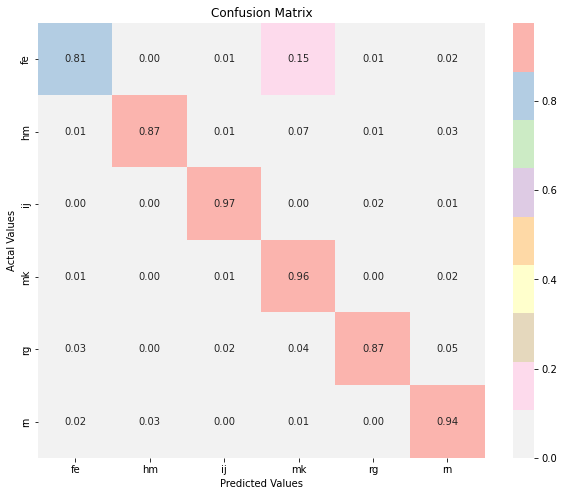

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Decision Tree
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.3380952380952381
              precision    recall  f1-score   support

           0       0.37      0.39      0.38        98
           1       0.42      0.42      0.42       115
           2       0.39      0.31      0.35       118
           3       0.24      0.34      0.28        89
           4       0.32      0.27      0.29       108
           5       0.30      0.30      0.30       102

    accuracy                           0.34       630
   macro avg       0.34      0.34      0.34       630
weighted avg       0.34      0.34      0.34       630



In [ ]:
#Hyper Parameter Tuning (Decision Tree)
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6}

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=6)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.3047619047619048
              precision    recall  f1-score   support

           0       0.36      0.44      0.39        98
           1       0.40      0.36      0.38       115
           2       0.42      0.31      0.36       118
           3       0.21      0.28      0.24        89
           4       0.25      0.24      0.25       108
           5       0.21      0.20      0.20       102

    accuracy                           0.30       630
   macro avg       0.31      0.30      0.30       630
weighted avg       0.31      0.30      0.31       630



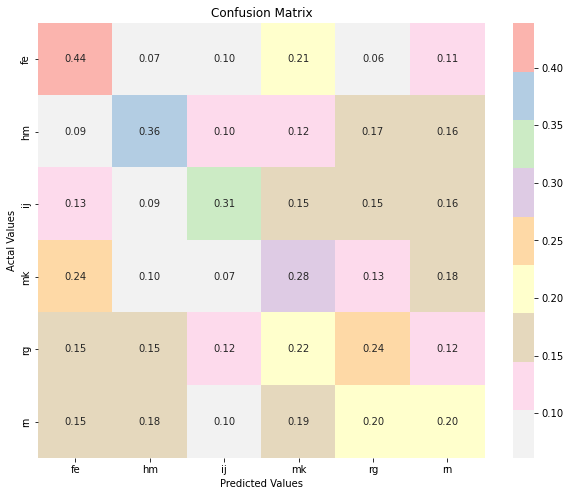

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.5761904761904761
              precision    recall  f1-score   support

           0       0.93      0.51      0.66        98
           1       0.32      0.99      0.49       115
           2       0.98      0.46      0.62       118
           3       0.79      0.69      0.73        89
           4       0.92      0.50      0.65       108
           5       0.97      0.29      0.45       102

    accuracy                           0.58       630
   macro avg       0.82      0.57      0.60       630
weighted avg       0.81      0.58      0.60       630



In [ ]:
#Hyper Parameter Tuning (KNeighborsClassifier)
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

In [ ]:
bestF.best_params_

{'n_neighbors': 7, 'p': 5}

In [ ]:
model = KNeighborsClassifier(n_neighbors=7,p=5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.5603174603174603
              precision    recall  f1-score   support

           0       0.84      0.58      0.69        98
           1       0.34      1.00      0.51       115
           2       0.93      0.35      0.51       118
           3       0.64      0.76      0.70        89
           4       0.92      0.41      0.56       108
           5       0.97      0.27      0.43       102

    accuracy                           0.56       630
   macro avg       0.77      0.56      0.57       630
weighted avg       0.77      0.56      0.56       630



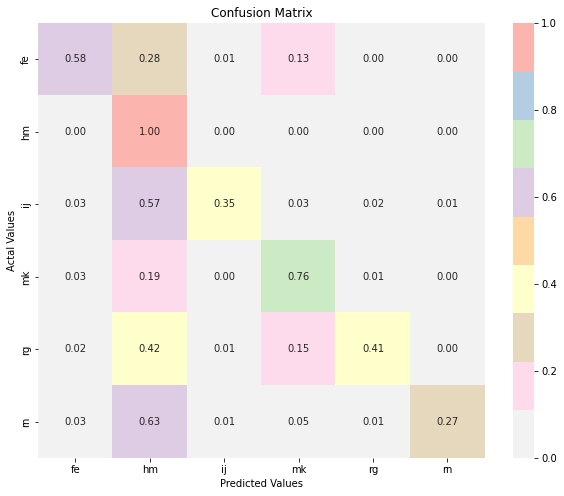

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()